## PROBLEM STATEMENT:
      
PREDICTION OF HOUSE PRICING USING MACHINE LEARNING WITH PYTHON


## Importing the necessary packages and modules

- <b>numpy</b> package can be used to perform mathematical operations like 'mean'.
- <b>pandas</b> package can be used to process dataframes.
- <b>seaborn</b> package can be used to visualise data in the form of various effective graphs and plots.
- <b>sklearn</b> is the main package which is used for machine learning.
- <b>LabelEncoder</b> is used to encode the non-numeric data into numericals so that machine learning model can be built.
- <b>train_test_split module</b> is used to split the data into training and testing sets.
- <b>LinearRegression</b> module is used to fit a LinearRegression model.
- <b>sklearn.metrics</b> can be used to calculate statistical results like mean squared error, root mean squared error, etc.

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as seb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import r2_score
%matplotlib inline

## Reading the dataset
- The <b>dataset</b> needs to be imported and read - we use <b>pandas</b> to acheive this.

In [3]:
#reading the dataset
train_data = pd.read_csv('dataset3.csv')
train_data.head(5)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
0,7129300520,20141013,3,1,1180,5650,1,no,0,3,7,1180,0,1955,1995.0,98178,47.5112,-1227.000,221900
1,6414100192,20141209,3,2,2570,7242,2,no,0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,538000
2,5631500400,20150225,2,1,770,10000,1,no,0,3,6,770,0,1933,1995.0,98028,47.7379,-122.233,180000
3,2487200875,20141209,4,3,1960,5000,1,no,0,5,7,1050,910,1965,1995.0,98136,47.5208,-122.393,604000
4,1954400510,20150218,3,2,1680,8080,1,no,0,3,8,1680,0,1987,1995.0,98074,47.6168,-122.045,510000


In [4]:
train_data.shape

(16914, 19)

In [5]:
train_data.drop(columns=['id','view','condition','grade','sqft_above','yr_built','sqft_lot','yr_renovated'])

,date,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_basement,zipcode,lat,long,price
0,20141013,3,1,1180,1,no,0,98178,47.5112,-1227.000,221900
1,20141209,3,2,2570,2,no,400,98125,47.7210,-122.319,538000
2,20150225,2,1,770,1,no,0,98028,47.7379,-122.233,180000
3,20141209,4,3,1960,1,no,910,98136,47.5208,-122.393,604000
4,20150218,3,2,1680,1,no,0,98074,47.6168,-122.045,510000
...,...,...,...,...,...,...,...,...,...,...,...
16909,20141001,3,2,2930,2,no,0,98052,47.7100,-122.113,754842
16910,20140924,4,2,2598,2,no,0,98092,47.3412,-122.178,428900
16911,20140623,3,2,2242,2,no,0,98092,47.2595,-122.202,329900
16912,20141218,4,2,2830,2,no,0,98199,47.6479,-122.408,1035290


## Processing the dataset
- After the data has been imported, we have to <b>clean/preprocess</b> the data to actually fit into a <b>regression</b> model

#### 1. Checking for missing entries

In [6]:
#Checking for missing entries
train_data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
price            0
dtype: int64

## VISUALIZATIONS OF THE DATA

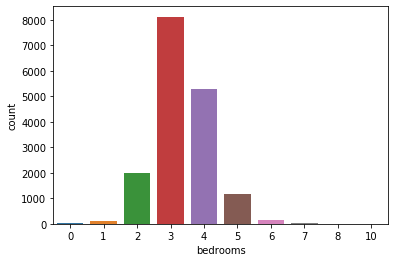

In [7]:
#barplot on gender
seb.countplot(train_data['bedrooms'])

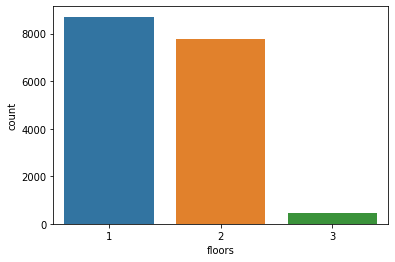

In [8]:
#barplot on martial status
seb.countplot(train_data['floors'])

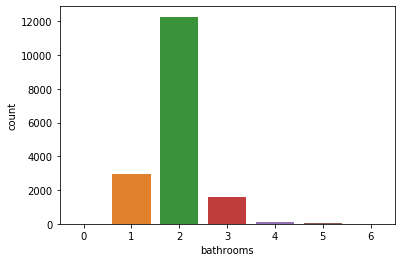

In [9]:
#barplot on martial status
seb.countplot(train_data['bathrooms'])

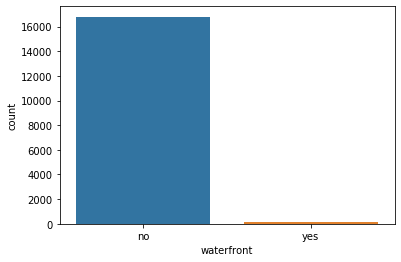

In [10]:
#barplot on stay in current city
seb.countplot(train_data['waterfront'])

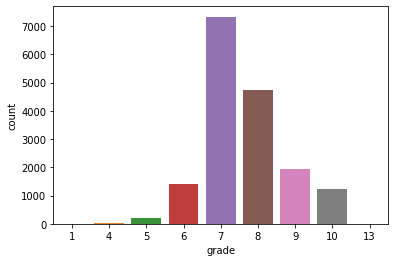

In [11]:
seb.countplot(train_data['grade'])

### 3. Encoding the data set so as to make it easy for building machine learning model
- The original data has <b>non-numerical</b> entries for few columns
- We encode these non-numerical entries using <b>LabelEncoder</b>

In [12]:
label_enc = LabelEncoder()
data_enc = train_data

# encoding few string-contained columns
#data_enc.Product_ID = label_enc.fit_transform(train_data.Product_ID)
data_enc.waterfront = label_enc.fit_transform(train_data.waterfront)
data_enc.head(10)



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
0,7129300520,20141013,3,1,1180,5650,1,0,0,3,7,1180,0,1955,1995.0,98178,47.5112,-1227.000,221900
1,6414100192,20141209,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,538000
2,5631500400,20150225,2,1,770,10000,1,0,0,3,6,770,0,1933,1995.0,98028,47.7379,-122.233,180000
3,2487200875,20141209,4,3,1960,5000,1,0,0,5,7,1050,910,1965,1995.0,98136,47.5208,-122.393,604000
4,1954400510,20150218,3,2,1680,8080,1,0,0,3,8,1680,0,1987,1995.0,98074,47.6168,-122.045,510000
5,7237550310,20140512,4,2,5420,101930,1,0,0,3,10,3890,1530,2001,1995.0,98053,47.6561,-122.005,1225000
6,1321400060,20140627,3,2,1715,6819,2,0,0,3,7,1715,0,1995,1995.0,98003,47.3097,-122.327,257500
7,2008000270,20150115,3,2,1060,9711,1,0,0,3,7,1060,0,1963,1995.0,98198,47.4095,-122.315,291850
8,2414600126,20150415,3,1,1780,7470,1,0,0,3,7,1050,730,1960,1995.0,98146,47.5123,-122.337,229500
9,3793500160,20150312,3,2,1890,6560,2,0,0,3,7,1890,0,2003,1995.0,98038,47.3684,-122.031,323000


#### Finding the correlation using corr()

In [13]:
#Finding the correlation using corr()
train_data.corr()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
id,1.000000,-0.010762,-0.011548,-0.016311,-0.004928,-0.137410,0.014862,-0.042106,-0.001824,-0.061638,0.019061,-0.004273,-0.002152,0.047656,0.016310,-0.051605,0.002791,0.034272,-0.009977
date,-0.010762,1.000000,-0.028534,-0.048033,-0.036402,-0.015133,-0.031784,0.012839,-0.026443,-0.006256,-0.033873,-0.028499,-0.021415,-0.016914,-0.007876,0.031447,-0.013912,0.013217,-0.000339
bedrooms,-0.011548,-0.028534,1.000000,0.411505,0.571282,0.073981,0.169489,-0.049278,0.048496,0.060039,0.369390,0.474588,0.286797,0.134049,-0.004393,-0.184012,-0.021883,-0.006409,0.303599
bathrooms,-0.016311,-0.048033,0.411505,1.000000,0.601395,0.146873,0.301025,0.078414,0.177024,-0.035326,0.528014,0.510290,0.282650,0.397705,0.021363,-0.192022,0.033754,0.016391,0.425656
sqft_living,-0.004928,-0.036402,0.571282,0.601395,1.000000,0.214275,0.300259,0.079774,0.287092,-0.012205,0.749524,0.866689,0.437214,0.306083,0.007393,-0.226821,0.094235,0.022583,0.699724
sqft_lot,-0.137410,-0.015133,0.073981,0.146873,0.214275,1.000000,-0.025371,0.032709,0.044916,-0.018077,0.115099,0.230302,0.013289,0.088226,-0.003742,-0.139370,-0.023058,0.013008,0.126084
floors,0.014862,-0.031784,0.169489,0.301025,0.300259,-0.025371,1.000000,-0.008230,-0.016383,-0.206813,0.392831,0.487184,-0.277887,0.357227,0.009842,-0.020367,0.088723,0.010945,0.232936
waterfront,-0.042106,0.012839,-0.049278,0.078414,0.079774,0.032709,-0.008230,1.000000,0.374299,0.051704,0.052926,0.048172,0.072679,-0.021861,-0.000974,0.032525,-0.027314,0.009433,0.275155
view,-0.001824,-0.026443,0.048496,0.177024,0.287092,0.044916,-0.016383,0.374299,1.000000,0.076940,0.232820,0.141854,0.318367,-0.044622,-0.003092,0.068921,0.012368,-0.009300,0.428553
condition,-0.061638,-0.006256,0.060039,-0.035326,-0.012205,-0.018077,-0.206813,0.051704,0.076940,1.000000,-0.085566,-0.106407,0.167431,-0.339413,-0.007694,0.034816,-0.050107,0.002231,0.059768


### visualizing the correlation

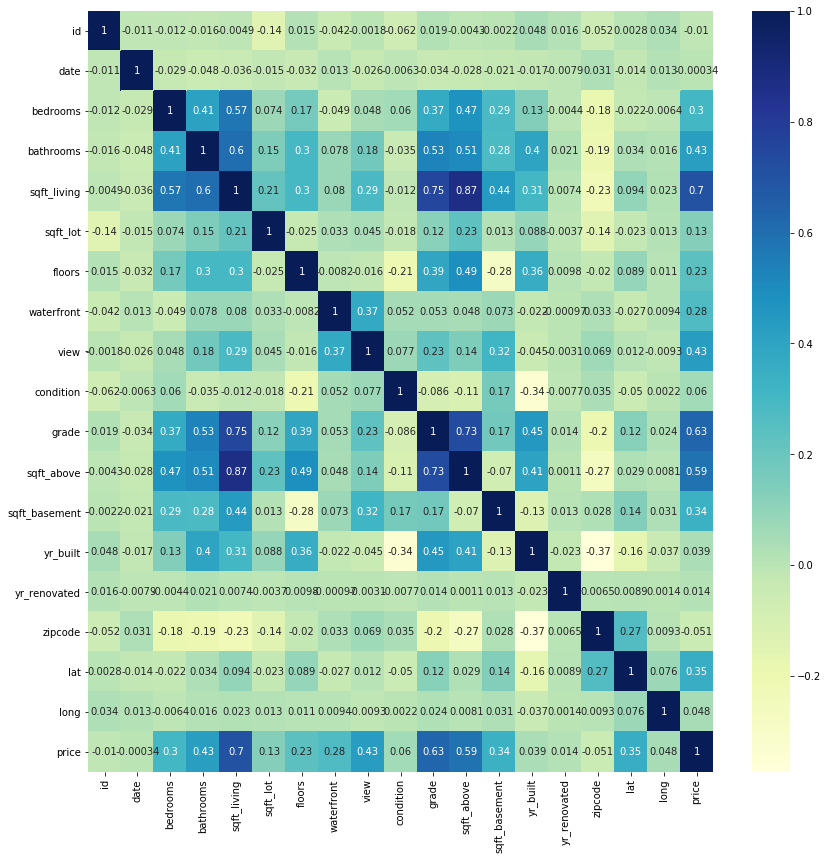

In [14]:
#visualizing the correlation
plt.figure(figsize=(14,14))
seb.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

## Declaring input and output variables
- Input variables are considered as all the columns except the Purchase column
- Output variables are considered as the last column, i.e, the Purchase column

In [15]:
#Declaring input and output variables
X=train_data.drop(['price'],axis=1)
y=train_data.price

## Splitting the data into train and test sets
- Input train and test sets are 2 dimensional
- Output train and test sets are 1 dimensional

In [16]:
#divide the X and y into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12685, 18)
(4229, 18)
(12685,)
(4229,)


## Fitting the data into Linear Regression model

In [17]:
#Fitting the data into Linear Regression model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### intercept and coefficient values

In [18]:
#intercept and coefficient values
print(lm.intercept_)
lm.coef_

-33767304.94010432


array([ 5.88233281e-07,  2.15754209e+00, -2.47506127e+04,  2.73099272e+04,
        1.14264864e+02, -2.37658193e-02,  2.05392556e+04,  7.20903847e+05,
        7.29703986e+04,  1.45794269e+04,  8.03617001e+04,  6.94519701e+01,
        4.48128937e+01, -2.45879731e+03, -1.75639331e-09, -3.48315771e+02,
        6.05246026e+05,  9.67777415e+00])

### creating a dataframe for cofficients

In [19]:
#creating a dataframe for cofficients
coefficients=pd.DataFrame([X_train.columns,lm.coef_]).T
coefficients

,0,1
0,id,5.88233e-07
1,date,2.15754
2,bedrooms,-24750.6
3,bathrooms,27309.9
4,sqft_living,114.265
5,sqft_lot,-0.0237658
6,floors,20539.3
7,waterfront,720904
8,view,72970.4
9,condition,14579.4


### checking the model prediction on training data

In [20]:
#checking the model prediction on training data
y_train_pred = lm.predict(X_train)
y_train_pred

array([402337.17967077, 139548.06142295, 597384.36056823, ...,
       470297.30789506, 539161.20752291, 553696.93050181])

### comparing the actual values(y_train) and the predicted values(y_train_pred)

In [21]:
#comparing the actual values(y_train) and the predicted values(y_train_pred)
y_train==y_train_pred

10214    False
8495     False
13183    False
4837     False
4055     False
         ...  
9225     False
13123    False
9845     False
10799    False
2732     False
Name: price, Length: 12685, dtype: bool

In [22]:
#r2_score
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_train,y_train_pred))
print("Adjusted R^2:",1-(1-r2_score(y_train,y_train_pred))*(len(X_train)-1)/
     (len(X_train)-X_train.shape[1]-1))

R^2: 0.7052419493142321
Adjusted R^2: 0.7048230605638497


### regplot

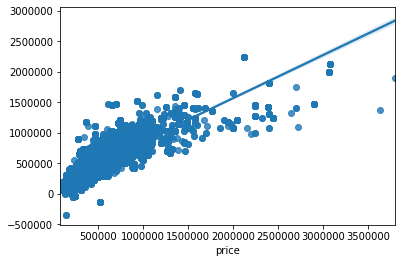

In [23]:
#regplot
seb.regplot(y_train,y_train_pred)

###  Visualizing the differences between acutal values and predicted values

Text(0, 0.5, 'model predicted purchase')

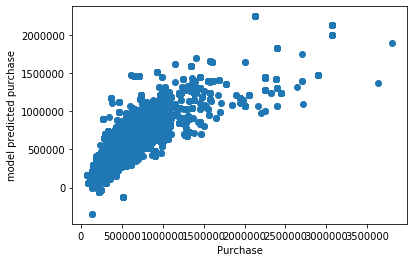

In [24]:
#Visualizing the differences between acutal values and predicted values
plt.scatter(y_train,y_train_pred)
plt.xlabel('Purchase')
plt.ylabel('model predicted purchase')

### plot for residuals(errors)
-  y_train-y_train_pred=Errors

Text(0, 0.5, 'errors')

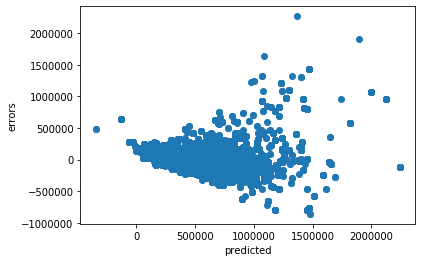

In [25]:
#plot for residuals(errors)
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.xlabel("predicted")
plt.ylabel("errors")

### Predicting the output test values for input test values

In [26]:
#Predicting the output test values for input test values
y_test_pred=lm.predict(X_test)
y_test_pred

array([863080.11138575, 438150.51750595, 146233.29341844, ...,
       759515.72811555, 153833.13146625, 446720.38254938])

### Comparing the actual output test values with the predicted output test values
- returning boolean values while comparing the output test values with predicted output test values

In [27]:
#Comparing the actual output test values with the predicted output test values
y_test==y_test_pred

5505     False
5396     False
11114    False
11413    False
380      False
         ...  
534      False
7740     False
11359    False
10734    False
3369     False
Name: price, Length: 4229, dtype: bool

### Visualising the data for the actual values vs. the predicted values

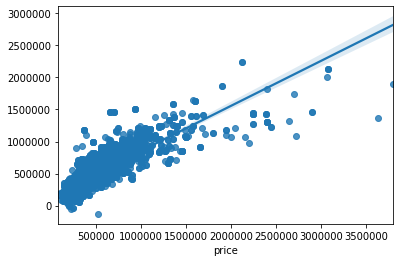

In [28]:
#Visualising the data for the actual values vs. the predicted values
seb.regplot(y_test, y_test_pred)

#### Visualizing the differences between acutal values and predicted values

Text(0, 0.5, 'Model Predicted Price')

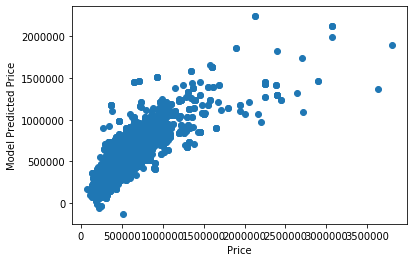

In [29]:
#Visualizing the differences between acutal values and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel('Price')
plt.ylabel('Model Predicted Price')

#### plot for residuals(errors)

Text(0, 0.5, 'errors')

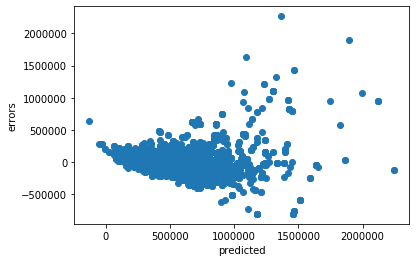

In [30]:
#plot for residuals(errors)
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.xlabel("predicted")
plt.ylabel("errors")

### Statistical Results

In [31]:
#Statistical Results
difference = np.mean(y_test) - np.mean(y_test_pred)
error = (np.mean(y_test) - np.mean(y_test_pred))/np.mean(y_test)

print('Predicted Mean : %.2f' % np.mean(y_test_pred), end = '\n\n')
print('Actual Mean : %.2f' % np.mean(y_test), end = '\n\n')
print('Difference : %.2f' % difference, end = '\n\n')
print('Coefficients :')
print(lm.coef_, end = '\n\n')
print('Variance score: %.4f' % lm.score(X_test, y_test), end = '\n\n')  
print('Percentage Error : %.4f' % (error*100), end = '\n\n')

Predicted Mean : 519150.92

Actual Mean : 520662.55

Difference : 1511.63

Coefficients :
[ 5.88233281e-07  2.15754209e+00 -2.47506127e+04  2.73099272e+04
  1.14264864e+02 -2.37658193e-02  2.05392556e+04  7.20903847e+05
  7.29703986e+04  1.45794269e+04  8.03617001e+04  6.94519701e+01
  4.48128937e+01 -2.45879731e+03 -1.75639331e-09 -3.48315771e+02
  6.05246026e+05  9.67777415e+00]

Variance score: 0.6972

Percentage Error : 0.2903



### Error Metrics
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error
### Performance Metrics
1. R^2 value
2. Adjusted R^2 value

In [32]:
#Error Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("R^2:",r2_score(y_test,y_test_pred))
print("MAE:",mean_absolute_error(y_test,y_test_pred))
print("MSE:",mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

R^2: 0.697224196346605
MAE: 112493.72529580983
MSE: 33013940726.36817
RMSE: 181697.38778080486


## scaling

In [33]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1.432017,-0.666605,0.749084,0.114328,1.279662,0.029720,0.893761,-0.083101,-0.301355,0.840220,1.265863,1.786006,-0.661335,-0.323955,-0.013405,-0.668008,-0.024069,0.118553
1,1.401334,-0.594244,0.749084,0.114328,-0.547841,-0.235707,-0.930431,-0.083101,-0.301355,0.840220,-0.578975,-1.016537,0.737383,-0.289180,-0.013405,-0.440272,0.846862,0.119034
2,-0.451962,1.515272,-0.413398,-1.712182,-1.303660,-0.199288,-0.930431,-0.083101,-0.301355,0.840220,-1.501395,-1.079093,-0.661335,-0.323955,-0.013405,-0.307427,-0.520640,0.119003
3,-1.132860,-0.618364,0.749084,0.114328,0.794584,-0.220809,0.893761,-0.083101,-0.301355,-0.649811,2.188283,1.248018,-0.661335,0.962734,-0.013405,-0.800854,0.921312,0.118639
4,-0.966261,-0.641106,-1.575880,0.114328,-0.773459,6.472294,-0.930431,-0.083101,-0.301355,-3.629875,-1.501395,-0.491060,-0.661335,-0.602158,-0.013405,-1.218369,1.357480,0.118716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,-1.037253,1.495746,-0.413398,-1.712182,-1.157009,-0.233886,-0.930431,-0.083101,-0.301355,0.840220,-1.501395,-0.916446,-0.661335,-0.010977,-0.013405,-1.237347,-1.702015,0.120064
4225,1.729790,-0.683834,0.749084,0.114328,1.211976,-0.001600,0.893761,-0.083101,-0.301355,-0.649811,2.188283,1.710938,-0.661335,0.788857,-0.013405,-0.003779,0.291292,0.120088
4226,-0.130234,-0.597689,-0.413398,0.114328,0.591528,-0.172372,-0.930431,-0.083101,-0.301355,2.330252,0.343444,-0.415992,1.933063,0.197675,-0.013405,-0.895743,1.519024,0.118197
4227,1.646078,-0.618134,-2.738362,-1.712182,-1.574401,-0.316160,-0.930431,-0.083101,-0.301355,-0.649811,-2.423814,-1.379366,-0.661335,-1.784521,-0.013405,0.964097,-0.130828,0.117337


In [34]:
# Model Building:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                    weights='uniform')

In [35]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array([338250.   , 201872.   , 466350.   , ..., 445787.5  , 505960.55 ,
       480598.675])

## Implementing knn regressor

In [36]:
# Checking for optimum k-value
# Build the models with multiple k values
scores=[]
for k in range(1, 20):
    knn_model = KNeighborsRegressor(n_neighbors = k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(mean_squared_error(y_test, pred_test))
scores

[2370313860.6909437,
 4150663398.339974,
 5587340923.400751,
 6497161523.869029,
 7388642595.468575,
 8123801734.922125,
 8812068737.845776,
 9589491814.203909,
 10399694913.348295,
 11302544217.749224,
 12351682851.83076,
 13455896126.081488,
 14556210933.327475,
 15640020123.862183,
 16667842964.617674,
 17563994118.46564,
 18268227468.22054,
 18888415710.198658,
 19492174870.15249]

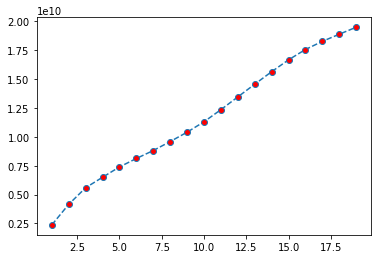

In [37]:
# Plottting of K values and Scores
plt.plot(range(1,20), scores, marker='o', markerfacecolor='r', linestyle='--')

In [37]:
# Optimum k value is 19
final_model = KNeighborsRegressor(n_neighbors=19, metric='euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')

In [38]:
# Prediction on  training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array([336315.78947368, 223732.10526316, 474947.36842105, ...,
       490263.15789474, 598171.15789474, 387102.47368421])

In [39]:
print(r2_score(y_train, final_train_pred))

0.8661993379431747


In [40]:
# Predictions on Test Data
final_test_pred = final_model.predict(scaled_X_test)  # y_test
final_test_pred

array([942684.21052632, 465947.36842105, 251865.78947368, ...,
       582052.63157895, 227368.42105263, 512420.        ])

In [41]:
print(r2_score(y_test, final_test_pred))

0.8212343397542601


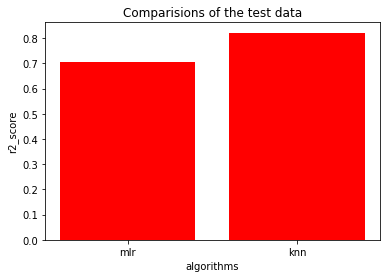

In [42]:
#Comparision of the test data
algorithms=['mlr','knn'] 
r2_score=[0.7052419493142321,0.8212343397542601] 
plt.bar(algorithms,r2_score,color="red")
plt.xlabel("algorithms")
plt.ylabel("r2_score")
plt.title('Comparisions of the test data')
plt.show()